### XGBoost

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import json
import boto3
import sagemaker
from sagemaker import get_execution_role

import pandas as pd
import numpy as np

from sqlalchemy import create_engine, text
from sqlalchemy.orm import sessionmaker

from sagemaker.feature_store.feature_group import FeatureGroup

pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)
import os
import io

import psycopg2
import gc

import pandas as pd
import numpy as np

from datetime import datetime

import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt


from lifelines import KaplanMeierFitter
from lifelines import CoxPHFitter, WeibullAFTFitter
from sklearn.pipeline import Pipeline
from lifelines.utils.sklearn_adapter import sklearn_adapter


from sklearn.preprocessing import StandardScaler, Normalizer, StandardScaler, OrdinalEncoder
from sklearn.impute import SimpleImputer
from sagemaker.feature_store.feature_group import FeatureGroup


from sklearn.feature_extraction.text import _VectorizerMixin
from sklearn.feature_selection._base import SelectorMixin
from sklearn import set_config

# import time
# set_config(display='diagram') 


import requests
from requests.auth import HTTPBasicAuth


from sklearn.model_selection import train_test_split

from sklearn.preprocessing import OneHotEncoder, StandardScaler, Normalizer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, f1_score, precision_recall_fscore_support, roc_curve, precision_recall_curve


%matplotlib inline

In [3]:
df = pd.read_csv('ma_postconv_jorn_zip_tu.csv')

/Users/jawhar/opt/anaconda3/envs/ma-dc/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3397: DtypeWarning: Columns (9,45) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [4]:
df.isnull().sum().sort_values(ascending=False) / df.shape[0] * 100

jrn_request_smoker                                  99.942844
post_raw_coverage_duration                          93.469874
jrn_request_gender                                  91.055013
jrn_response_audit_market_leadid_tcpa_contrast      89.578471
jrn_response_audit_market_leadid_tcpa_prominence    89.578471
jrn_response_audit_market_leadid_tcpa_visibility    89.578471
jrn_response_audit_market_leadid_tcpa_disclosure    89.230769
tu_DEMO_AFFILIATION_MATCH                           84.458204
jrn_response_audit_device_week                      82.162420
jrn_response_audit_consumer_hour                    81.895689
jrn_response_audit_consumer_five_minutes            81.895689
jrn_response_audit_lead_age                         81.733746
tu_DEMO_OCCUPATION_FIRST                            81.733746
tu_DEMO_OCCUPATION_MATCH                            81.700405
jrn_response_audit_fields_address1                  80.838295
jrn_response_audit_fields_l_name                    80.828769
jrn_resp

In [5]:
df

,application_id,owner_email,application_name,policy_id,owner_id,owner_phone,sk_submitted_date,sk_owner_gender,sk_date_of_birth,app_zip_code,pol_zip_code,parent_application_id,sk_referral_flag,bk_product_type,carrier,bk_gender,lead_id,first_name,last_name,submitted_month,submitted_year,area_code,age,post_raw_application_id,post_raw_medicare_number,post_raw_cancellation_model_prediction,post_raw_probability_of_cancellation,post_raw_duration_model_prediction,post_raw_LTV,post_raw_coverage_duration,post_raw_policy_id,jrn_boberdoo_amount,jrn_boberdoo_source,jrn_boberdoo_lead_type,jrn_date,jrn_event_date,jrn_firstparty,jrn_is_first_party,jrn_error,jrn_year,jrn_month,jrn_day,jrn_hour,jrn_request_city,jrn_request_state,jrn_request_smoker,jrn_request_gender,jrn_response_audit_authentic,jrn_response_audit_consumer_five_minutes,jrn_response_audit_consumer_hour,jrn_response_audit_consumer_twelve_hours,jrn_response_audit_consumer_twelve_consumer_day,jrn_response_audit_consumer_week,jrn_response_audit_data_integrity,jrn_response_audit_fields_email,jrn_response_audit_fields_f_name,jrn_response_audit_fields_l_name,jrn_response_audit_fields_phone1,jrn_response_audit_fields_city,jrn_response_audit_fields_state,jrn_response_audit_fields_address1,jrn_response_audit_device_five_minutes,jrn_response_audit_device_hour,jrn_response_audit_device_twelve_hours,jrn_response_audit_device_day,jrn_response_audit_device_week,jrn_response_audit_consumer_dupe_check,jrn_response_audit_entity_value,jrn_response_audit_ip_five_minutes,jrn_response_audit_ip_hour,jrn_response_audit_ip_twelve_hours,jrn_response_audit_ip_day,jrn_response_audit_ip_week,jrn_response_audit_lead_age,jrn_response_audit_age,jrn_response_audit_lead_duration,jrn_response_audit_duration,jrn_response_audit_lead_dupe_check,jrn_response_audit_lead_dupe,jrn_response_audit_lead_five_minutes,jrn_response_audit_lead_hour,jrn_response_audit_lead_twelve_hours,jrn_response_audit_lead_day,jrn_response_audit_lead_week,jrn_response_audit_market_leadid_tcpa_disclosure,jrn_response_audit_market_leadid_tcpa_prominence,jrn_response_audit_market_leadid_tcpa_contrast,jrn_response_audit_market_leadid_tcpa_visibility,jrn_response_audit_market_leadid_tcpa_stored,jrn_response_audit_market_leadid_tcpa_capture,jrn_response_audit_market_leadid_tcpa_result,jrn_response_audit_market_leadid_result,jrn_response_audit_market_result,jrn_response_audit_url_value,jrn_response_audit_result,zip_state,zip_lat,zip_lng,zip_timezone,zip_radius_in_miles,zip_population,zip_population_density,zip_land_area_in_sqmi,zip_water_area_in_sqmi,zip_housing_units,zip_occupied_housing_units,zip_median_home_value,zip_median_household_income,zip_annual_checkup,zip_arthritis,zip_binge_drinking,zip_copd,zip_cancer_except_skin,zip_cervical_cancer_screening,zip_cholesterol_screening,zip_chronic_kidney_disease,zip_colorectal_cancer_screening,zip_core_preventive_services_for_older_men,zip_core_preventive_services_for_older_women,zip_coronary_heart_disease,zip_current_asthma,zip_current_smoking,zip_dental_visit,zip_diabetes,zip_health_insurance,zip_high_blood_pressure,zip_high_cholesterol,zip_mammography,zip_mental_health,zip_obesity,zip_physical_health,zip_physical_inactivity,zip_sleep_lt_7_hours,zip_stroke,zip_taking_bp_medication,zip_teeth_loss,zip_ma_penetration_2020,zip_ma_penetration_2021,zip_delta_ma_enrolled,zip_delta_ma_penetration_points,tu_CITY,tu_STATE,tu_DEMO_INCOME_DOLLARS,tu_DEMO_INCOME_MATCH,tu_DEMO_CHILDREN_YES,tu_DEMO_CHILDREN_NO,tu_DEMO_CHILDREN_MATCH,tu_DEMO_AFFILIATION_CONSERVATIVE,tu_DEMO_AFFILIATION_LIBERAL,tu_DEMO_AFFILIATION_MATCH,tu_DEMO_EDUCATION_YEARS,tu_DEMO_EDUCATION_MATCH,tu_DEMO_HOMEOWNER_YES,tu_DEMO_HOMEOWNER_NO,tu_DEMO_HOMEOWNER_MATCH,tu_DEMO_HOMEVALUE_DOLLARS,tu_DEMO_HOMEVALUE_MATCH,tu_DEMO_RESIDENT_YEARS,tu_DEMO_RESIDENT_MATCH,tu_DEMO_OCCUPATION_FIRST,tu_DEMO_OCCUPATION_MATCH,tu_STATUS_COUNT,tu_STATUS_LATENCY,tu_SUB_USER_ID,tu_GROUP_ID,tu_ACCOUNT,tu_CONTACT_SCORE,tu_CREDIT_SCORE,mod_LTV
0,0001b60b-18da-471e-a8d8-8f9ddc

In [6]:
# Define numeric and categorical features
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()

In [7]:
len(categorical_columns)

42

In [8]:
len(numeric_columns)

127

In [9]:
df['all_LTV'] = df['mod_LTV'].fillna(0)

In [10]:
y = df['all_LTV']

In [11]:
X = df[numeric_columns]

In [12]:
X = X.drop(['owner_phone',  'sk_referral_flag',  'lead_id', 'post_raw_cancellation_model_prediction',  'post_raw_probability_of_cancellation', 'post_raw_duration_model_prediction', 'post_raw_LTV',  'post_raw_coverage_duration',  'zip_lat',  'zip_lng',  'mod_LTV'], axis = 1)

In [13]:
X

,sk_owner_gender,submitted_month,submitted_year,area_code,age,jrn_boberdoo_amount,jrn_date,jrn_year,jrn_month,jrn_day,jrn_hour,jrn_response_audit_authentic,jrn_response_audit_consumer_five_minutes,jrn_response_audit_consumer_hour,jrn_response_audit_consumer_twelve_hours,jrn_response_audit_consumer_twelve_consumer_day,jrn_response_audit_consumer_week,jrn_response_audit_data_integrity,jrn_response_audit_fields_email,jrn_response_audit_fields_f_name,jrn_response_audit_fields_l_name,jrn_response_audit_fields_phone1,jrn_response_audit_fields_city,jrn_response_audit_fields_state,jrn_response_audit_fields_address1,jrn_response_audit_device_five_minutes,jrn_response_audit_device_hour,jrn_response_audit_device_twelve_hours,jrn_response_audit_device_day,jrn_response_audit_device_week,jrn_response_audit_consumer_dupe_check,jrn_response_audit_entity_value,jrn_response_audit_ip_five_minutes,jrn_response_audit_ip_hour,jrn_response_audit_ip_twelve_hours,jrn_response_audit_ip_day,jrn_response_audit_ip_week,jrn_response_audit_lead_age,jrn_response_audit_age,jrn_response_audit_lead_duration,jrn_response_audit_duration,jrn_response_audit_lead_dupe_check,jrn_response_audit_lead_dupe,jrn_response_audit_lead_five_minutes,jrn_response_audit_lead_hour,jrn_response_audit_lead_twelve_hours,jrn_response_audit_lead_day,jrn_response_audit_lead_week,jrn_response_audit_market_leadid_tcpa_disclosure,jrn_response_audit_market_leadid_tcpa_prominence,jrn_response_audit_market_leadid_tcpa_contrast,jrn_response_audit_market_leadid_tcpa_visibility,jrn_response_audit_market_leadid_tcpa_stored,jrn_response_audit_market_leadid_tcpa_capture,jrn_response_audit_market_leadid_tcpa_result,jrn_response_audit_market_leadid_result,jrn_response_audit_market_result,jrn_response_audit_url_value,jrn_response_audit_result,zip_radius_in_miles,zip_population,zip_population_density,zip_land_area_in_sqmi,zip_water_area_in_sqmi,zip_housing_units,zip_occupied_housing_units,zip_median_home_value,zip_median_household_income,zip_annual_checkup,zip_arthritis,zip_binge_drinking,zip_copd,zip_cancer_except_skin,zip_cervical_cancer_screening,zip_cholesterol_screening,zip_chronic_kidney_disease,zip_colorectal_cancer_screening,zip_core_preventive_services_for_older_men,zip_core_preventive_services_for_older_women,zip_coronary_heart_disease,zip_current_asthma,zip_current_smoking,zip_dental_visit,zip_diabetes,zip_health_insurance,zip_high_blood_pressure,zip_high_cholesterol,zip_mammography,zip_mental_health,zip_obesity,zip_physical_health,zip_physical_inactivity,zip_sleep_lt_7_hours,zip_stroke,zip_taking_bp_medication,zip_teeth_loss,zip_ma_penetration_2020,zip_ma_penetration_2021,zip_delta_ma_enrolled,zip_delta_ma_penetration_points,tu_DEMO_INCOME_DOLLARS,tu_DEMO_CHILDREN_YES,tu_DEMO_CHILDREN_NO,tu_DEMO_AFFILIATION_CONSERVATIVE,tu_DEMO_AFFILIATION_LIBERAL,tu_DEMO_EDUCATION_YEARS,tu_DEMO_HOMEOWNER_YES,tu_DEMO_HOMEOWNER_NO,tu_DEMO_HOMEVALUE_DOLLARS,tu_DEMO_RESIDENT_YEARS,tu_STATUS_COUNT,tu_STATUS_LATENCY,tu_SUB_USER_ID,tu_ACCOUNT,tu_CONTACT_SCORE,tu_CREDIT_SCORE
0,10004,11,2021,850.0,84,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0,28996.0,1150.0,25.20,17.86,16971.0,12043.0,147100.0,42148.0,79.00,27.00,18.40,8.50,7.20,83.50,79.50,3.10,63.10,36.60,27.90,7.60,9.20,19.00,60.30,11.80,19.00,35.6,33.70,70.80,15.10,31.20,13.60,26.20,40.20,3.70,74.20,15.90,38.10,41.28,2634.0,3.18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,10004,12,2021,540.0,56,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0,6315.0,76.0,83.33,0.60,3270.0,2742.0,108400.0,39635.0,80.30,32.70,14.80,9.65,8.95,85.00,82.45,3.50,67.15,34.70,36.35,9.25,9.30,19.65,68.10,12.65,14.20,38.4

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn import tree

from sklearn.metrics import mean_absolute_error, r2_score, median_absolute_error

import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X ,y , test_size=0.30)

<AxesSubplot:xlabel='all_LTV', ylabel='Count'>

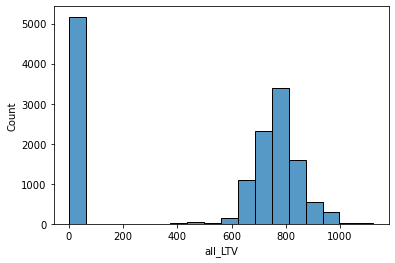

In [16]:
sns.histplot(y_train)

In [17]:
# X_train['gender_male'] = X_train['sk_owner_gender'] == 10008
# X_test['gender_male'] = X_test['sk_owner_gender'] == 10008

Standard

In [18]:
from xgboost.sklearn import XGBRegressor
from sklearn.preprocessing import StandardScaler
# enable for cat features=> enable_categorical=True


model = XGBRegressor()

# X_cols = ['age', 'gender_male', 'submitted_month', 'zip_median_home_value',
#           'jrn_response_audit_lead_duration', 'zip_cholesterol_screening', 'zip_median_household_income'
#          ]
model.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [19]:
preds = model.predict(X_test)

<AxesSubplot:ylabel='Count'>

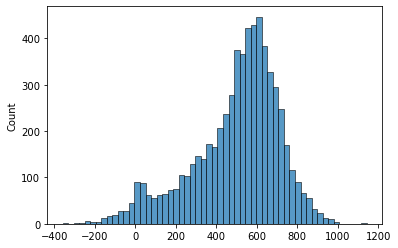

In [20]:
sns.histplot(preds)

In [21]:
import shap
shap.initjs()

In [22]:
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_train)

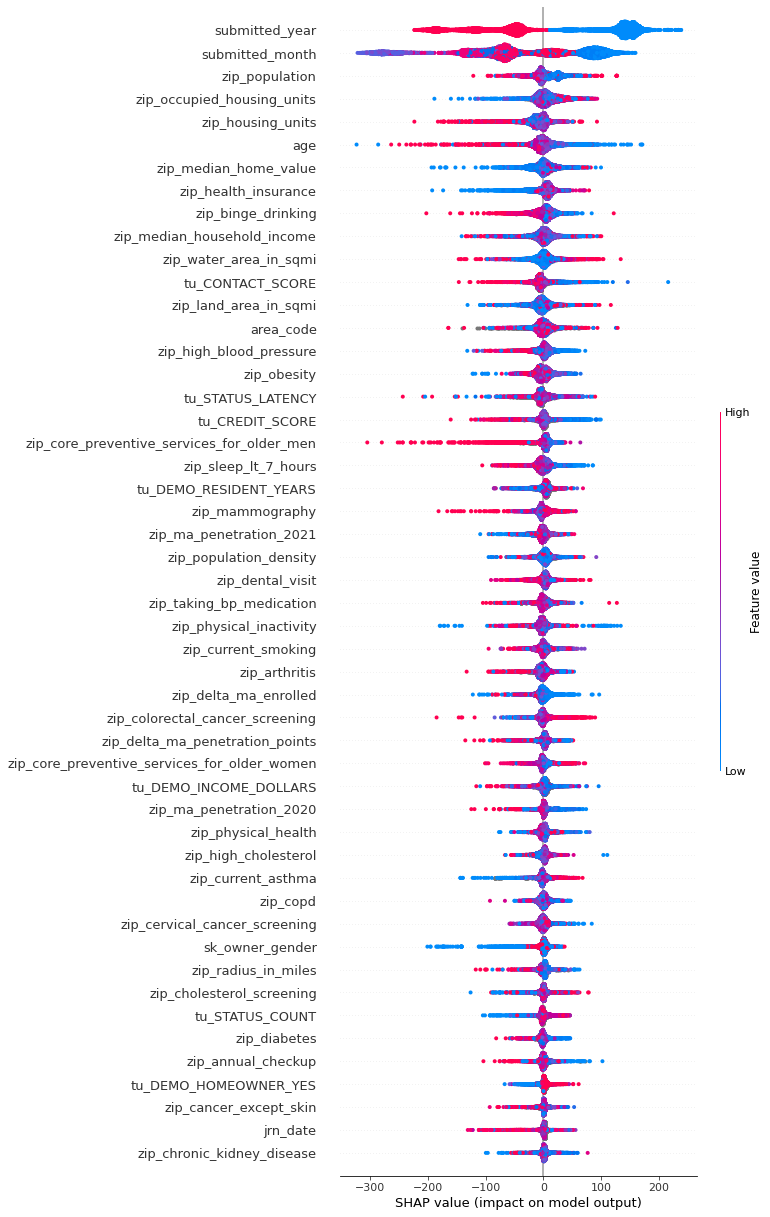

In [23]:
shap.summary_plot(shap_values, features=X_train, feature_names=X_train.columns, max_display=50)

In [46]:
type(np.argsort(np.abs(shap_values).mean(0)))

numpy.ndarray

In [47]:
X.columns[np.argsort(np.abs(shap_values).mean(0))][-50:]

Index(['zip_chronic_kidney_disease', 'jrn_date', 'zip_cancer_except_skin',
       'tu_DEMO_HOMEOWNER_YES', 'zip_annual_checkup', 'zip_diabetes',
       'tu_STATUS_COUNT', 'zip_cholesterol_screening', 'zip_radius_in_miles',
       'sk_owner_gender', 'zip_cervical_cancer_screening', 'zip_copd',
       'zip_current_asthma', 'zip_high_cholesterol', 'zip_physical_health',
       'zip_ma_penetration_2020', 'tu_DEMO_INCOME_DOLLARS',
       'zip_core_preventive_services_for_older_women',
       'zip_delta_ma_penetration_points', 'zip_colorectal_cancer_screening',
       'zip_delta_ma_enrolled', 'zip_arthritis', 'zip_current_smoking',
       'zip_physical_inactivity', 'zip_taking_bp_medication',
       'zip_dental_visit', 'zip_population_density', 'zip_ma_penetration_2021',
       'zip_mammography', 'tu_DEMO_RESIDENT_YEARS', 'zip_sleep_lt_7_hours',
       'zip_core_preventive_services_for_older_men', 'tu_CREDIT_SCORE',
       'tu_STATUS_LATENCY', 'zip_obesity', 'zip_high_blood_pressure',
      

In [24]:
print(f'mae: {mean_absolute_error(y_test, preds)}')
print(f'median absolute error: {median_absolute_error(y_test, preds)}')
print(f'r2: {r2_score(y_test, preds)}')

mae: 276.802781327889
median absolute error: 231.45796399238782
r2: 0.176734052616219


In [25]:
from sklearn.metrics import mean_squared_error as MSE

rmse = np.sqrt(MSE(y_test, preds))
print("RMSE : % f" %(rmse))

RMSE :  340.417512


Tweedie

In [26]:
from xgboost.sklearn import XGBRegressor
from sklearn.preprocessing import StandardScaler
# enable for cat features=> enable_categorical=True


model_t = XGBRegressor(objective='reg:tweedie')

# X_cols = ['age', 'gender_male', 'submitted_month', 'zip_median_home_value',
#           'jrn_response_audit_lead_duration', 'zip_cholesterol_screening', 'zip_median_household_income'
#          ]
model_t.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=8,
             num_parallel_tree=1, objective='reg:tweedie', predictor='auto',
             random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=None,
             subsample=1, tree_method='exact', validate_parameters=1,
             verbosity=None)

In [27]:
preds_t = model_t.predict(X_test)

<AxesSubplot:ylabel='Count'>

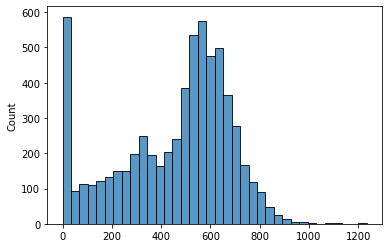

In [28]:
sns.histplot(preds_t)

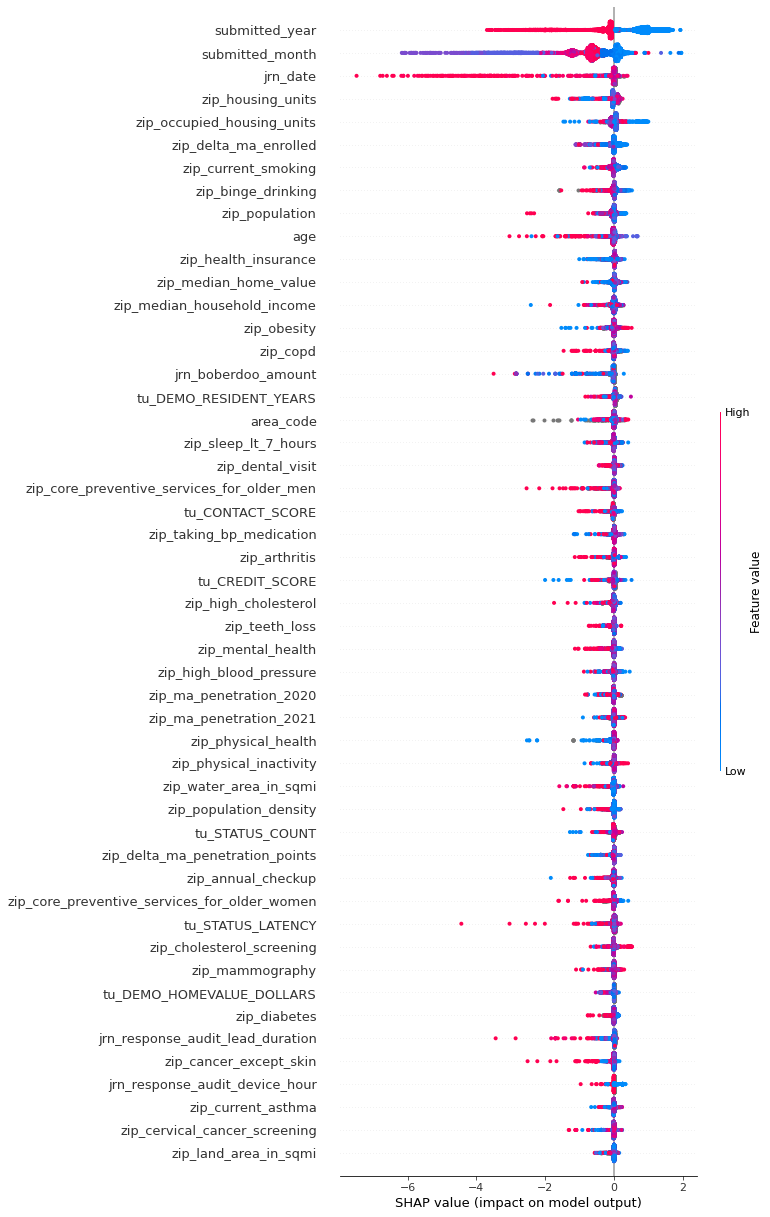

In [48]:
explainer = shap.TreeExplainer(model_t)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, features=X_test, feature_names=X_test.columns, max_display=50)

In [29]:
print(f'mae: {mean_absolute_error(y_test, preds_t)}')
print(f'median absolute error: {median_absolute_error(y_test, preds_t)}')
print(f'r2: {r2_score(y_test, preds_t)}')

mae: 287.9193892474539
median absolute error: 241.13336181640625
r2: 0.09073406556811392


In [30]:
from sklearn.metrics import mean_squared_error as MSE

rmse = np.sqrt(MSE(y_test, preds_t))
print("RMSE : % f" %(rmse))

RMSE :  357.756289


Poisson

In [31]:
from xgboost.sklearn import XGBRegressor
from sklearn.preprocessing import StandardScaler
# enable for cat features=> enable_categorical=True


model_p = XGBRegressor(objective='count:poisson')

# X_cols = ['age', 'gender_male', 'submitted_month', 'zip_median_home_value',
#           'jrn_response_audit_lead_duration', 'zip_cholesterol_screening', 'zip_median_household_income'
#          ]
model_p.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0.699999988, max_depth=6, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=8,
             num_parallel_tree=1, objective='count:poisson', predictor='auto',
             random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=None,
             subsample=1, tree_method='exact', validate_parameters=1,
             verbosity=None)

In [32]:
preds_p = model_p.predict(X_test)

<AxesSubplot:ylabel='Count'>

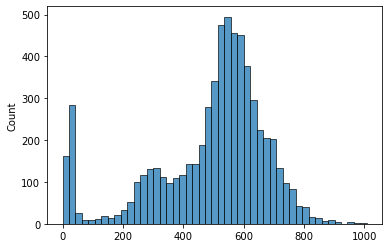

In [33]:
sns.histplot(preds_p)

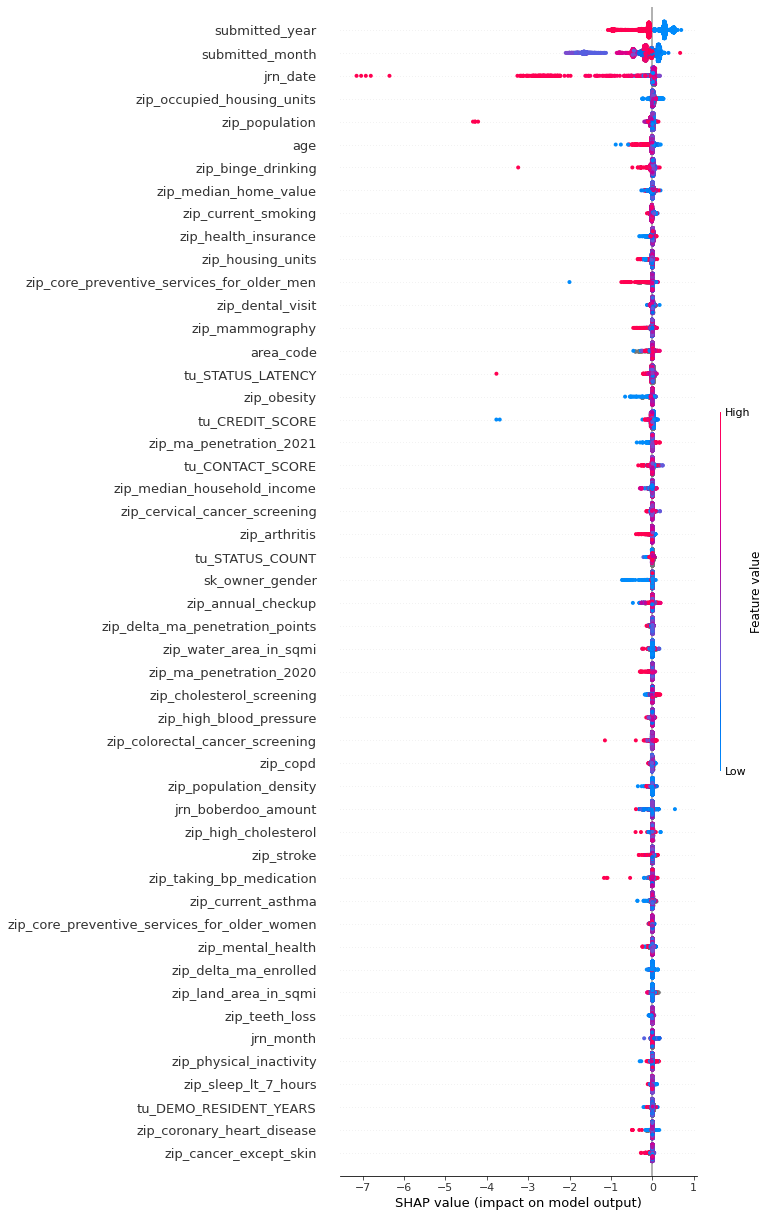

In [49]:
explainer = shap.TreeExplainer(model_p)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, features=X_test, feature_names=X_test.columns, max_display=50)

In [34]:
print(f'mae: {mean_absolute_error(y_test, preds_p)}')
print(f'median absolute error: {median_absolute_error(y_test, preds_p)}')
print(f'r2: {r2_score(y_test, preds_p)}')
rmse = np.sqrt(MSE(y_test, preds_p))
print("RMSE : % f" %(rmse))

mae: 278.6115220357556
median absolute error: 241.96741192157458
r2: 0.20336461288775431
RMSE :  334.866431


#### LightGBM

In [35]:
# !pip list

In [36]:
# !pip uninstall lightgbm --yes

In [37]:
# !pip list

In [39]:
# import pandas as pd 
# import numpy as np
# import lightgbm as lgb

In [40]:
# X_LGBM = df

In [41]:
# X_LGBM.columns

Index(['application_id', 'owner_email', 'application_name', 'policy_id',
       'owner_id', 'owner_phone', 'sk_submitted_date', 'sk_owner_gender',
       'sk_date_of_birth', 'app_zip_code',
       ...
       'tu_DEMO_OCCUPATION_MATCH', 'tu_STATUS_COUNT', 'tu_STATUS_LATENCY',
       'tu_SUB_USER_ID', 'tu_GROUP_ID', 'tu_ACCOUNT', 'tu_CONTACT_SCORE',
       'tu_CREDIT_SCORE', 'mod_LTV', 'all_LTV'],
      dtype='object', length=170)

In [42]:
# for feature in X_LGBM.columns:
#     dat[feature] = pd.Series(df[feature], dtype="category")

In [50]:
X_xgb= df[X.columns[np.argsort(np.abs(shap_values).mean(0))][-50:]]

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X_xgb ,y , test_size=0.30)

In [53]:
from xgboost.sklearn import XGBRegressor
from sklearn.preprocessing import StandardScaler
# enable for cat features=> enable_categorical=True


model_X = XGBRegressor(objective='count:poisson')

# X_cols = ['age', 'gender_male', 'submitted_month', 'zip_median_home_value',
#           'jrn_response_audit_lead_duration', 'zip_cholesterol_screening', 'zip_median_household_income'
#          ]
model_X.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0.699999988, max_depth=6, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=8,
             num_parallel_tree=1, objective='count:poisson', predictor='auto',
             random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=None,
             subsample=1, tree_method='exact', validate_parameters=1,
             verbosity=None)

In [54]:
preds_X = model_X.predict(X_test)

In [55]:
print(f'mae: {mean_absolute_error(y_test, preds_X)}')
print(f'median absolute error: {median_absolute_error(y_test, preds_X)}')
print(f'r2: {r2_score(y_test, preds_X)}')
rmse = np.sqrt(MSE(y_test, preds_X))
print("RMSE : % f" %(rmse))

mae: 277.33217567485156
median absolute error: 239.08546956380212
r2: 0.1953429265141462
RMSE :  335.067422
